     Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:

data = pd.read_csv('/datasets/games.csv')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Прочитаем и выведем на экран первые 10 строк датасета

                                  Шаг 2. Подготовьте данные

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выведем общую информацию

In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.isna().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

Считаем количество пропусков

In [6]:
pd.DataFrame(round(data.isna().mean()*100,).sort_values())

,0
Name,0.0
Platform,0.0
Genre,0.0
NA_sales,0.0
EU_sales,0.0
JP_sales,0.0
Other_sales,0.0
Year_of_Release,2.0
User_Score,40.0
Rating,40.0


Проверяем количество пропусков в % соотношении

In [7]:
data.duplicated().sum()

0

Дубликатов нет, отлично




<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'>Проанализировав информацию по датасету, видим, что есть недочеты в данных, а именно, пропуски в user_score, critic_score, rating, year_of_release, name. Исходя из знания, что пропуски, которых меньше 10% можно удалить, удаляем пропуски в name и year_of_release. Природы этих пропусков мы определить никак не сможем точно, только предположить, что игра могла быть не выпущена, а был только предрелиз, и на его основе были сделаны оценки критиков, а пользователькие оценки - это могли быть часть людей, кому дали потестить бета-версию. Также, названия столбцов имеют разный регитср, правильнее привести к нижнем регистру, так удобней ориентироваться и код дальше будет проще писать, дабы во избежание ошибок в написании. Очень интересно, что количесто пропусков в rating чуть больше, чем в user score. Удалить пропуски в этих столбцах нельзя, они нам важны для дальнейшего анализа, поэтому пропуски в них где то будем оставлять, а где то будем делать заглушки. Вернемся к тому в дальнейших шагах.<u><b></b></u></font>
    <br />
    <font color='4682B4'></font>
</div>

In [8]:
data.columns = data.columns.str.lower()

In [9]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Приводим названия столбцов к нижнему регистру




<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'>
        1.Касаемо удаления и оставления пропусков вроде написано ниже, или я что то не очень понял?
        2.Касаемо tbd ниже тоже есть комментарий, или же нужно сразу все в одном месте написать, а потом каждый пункт отделно рассматривать?
        3.Касаемо связи между пропусками в рейтинге и комиссией ESRB, согласно информации из открытых источников, отсутствие рейтинга могло произойти , т.к. для каждого региона своя ассоциация, которая делает рейтинг для игр, и вполне вероятно, что игра была выпущена под свой регион и имела рейтинг не ESRB, а PEGI или CERO<u><b></b></u></font>
    <br />
    <font color='4682B4'></font>
</div>

In [10]:
data= data.dropna(subset=['year_of_release'])

In [11]:
data['year_of_release'].isna().sum()

0

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Удаляем пропуски в столбце год релиза и приводим к целочисленному значению. Пропуски удаляем, т.к. их количество крайне мало, всего 2%.

In [14]:
data= data.dropna(subset=['name'])

In [15]:
data= data.dropna(subset=['genre'])

Пропуски в столбцах имя и жанр удаляем по тем же причинам, их мы никак не восстановим, это нужно запрашивать информацию у тех кто создавал датасет.

In [16]:
data.isna().sum().sort_values()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
user_score         6605
rating             6676
critic_score       8461
dtype: int64

In [17]:
data['user_score'].value_counts(dropna=False)

NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
0.3       2
0.7       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [18]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

In [19]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [20]:
data['user_score'].isna().sum()

8981

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Изменили тип данных в столбце user_score, название tbd (to be determined - ожидает релиза) автоматически перевелось в пропуски  

Пропуски в данных user score, rating, critic score могли появиться по разным причинам, кто-то не оценил игру, релиз игры не состоялся (tbd), пропусков много, медианным или средним значением их не заполнить, т.к. это разные игры и сделать оцену по жанру либо по платформе будет неправильно.

In [22]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [23]:
data['rating'] = data['rating'].replace('K-A', 'E')

In [24]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Рейтинг К-А тоже самое что и Е, потому сделаем замену.

In [25]:
data['rating'] = data['rating'].fillna(-1)

In [26]:
data['rating'].unique()

array(['E', -1, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)




<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'>Заполняем пропуски в рейтинге заглушкой, чтобы избежать некорректных выводов в дальнейшем анализе<u><b></b></u></font>
    <br />
    <font color='4682B4'></font>
</div>

In [27]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [28]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,-1,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,-1,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,-1,28.31


Добавляем столбец с общими продажами игры по всем регионам.

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'>
        В данном шаге, мы просмотрели основные параметры датасета, определили недочеты, все воможные исправили, привели к рабочему виду, определили количество пропусков, в столбцах, где пропусков менее 10% мы их удалили, т.к. в первую очередь природа их появления нам точно не ясна, их крайне мало, они могут и не понадобится средь общей массы данных для выполнения проекта, какие то пропуски заполнить медианным или средним значением будет крайне неправильно, т.к. повлечет за собой неправильные выводы. Также добавили новый столбец с суммарными продажами по каждому региону, чтобы в дальнейшем, воможно, посчитать долю продаж в каждом приведенном регионе. Столкнулись с таким параметром как "tbd" - что пришлось переименовать в nan, т.к. это самый настоящий пропуск. По оставшимся пропускам будем работать в процессе исследования.<u><b></b></u></font>
    <br />
    <font color='4682B4'></font>
</div>

                         Шаг 3. Проводим исследовательский анализ данных

In [29]:
games = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
display(games)


,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


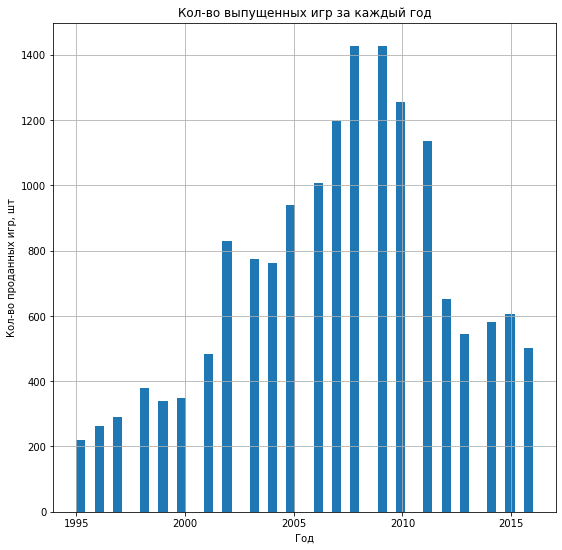

In [30]:
plt.title('Кол-во выпущенных игр за каждый год')
plt.ylabel('Кол-во проданных игр, шт')
plt.xlabel('Год')
data['year_of_release'].hist(figsize=(9, 9), bins = 50, range=(1995, 2016))
plt.show()


Отбрасываем года до 1995, т.к. в те периоды было выпущено мало игр, т.к. цифровая сфера только начинала развиваться. Все мы помним игры супер марио на приставках и Counter Strike, они были выпущены примерно в середине 90-х, с этого периода и начнем рассматривать данные. До 2008 года количество игр росло, в 2008 году произошел кризис, на рынке остались только самые "сильные" платформы, и стали они делать упор не количество произведенных игр, а на их качество, с каждым годом улучшая этот показатель. 

   Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [31]:
plat = data.pivot_table(index = 'platform',columns = 'year_of_release',values = 'sales', aggfunc='count')
display(plat)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,9.0,46.0,36.0,11.0,1.0,1.0,2.0,6.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,116.0,93.0,91.0,80.0,86.0,46.0
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,376.0,492.0,403.0,323.0,153.0,23.0,8.0,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


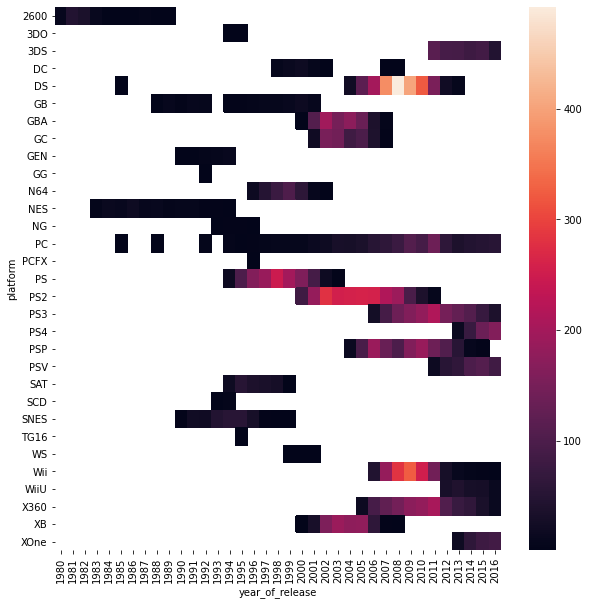

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(plat)
plt.show()

По тепловой карте видно, как одна плаформа сменяла другую, процесс не стоит на месте. Примерно за 5 лет полностью меняется платформа(новая сменяет старую). При выходе новой PS старая все меньше и меньше продавалась, PC платформа до сих пор остается так или иначе актуальной, в наши дни наравне с остальными актуальными приставками

In [33]:
plat1 = data.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False)


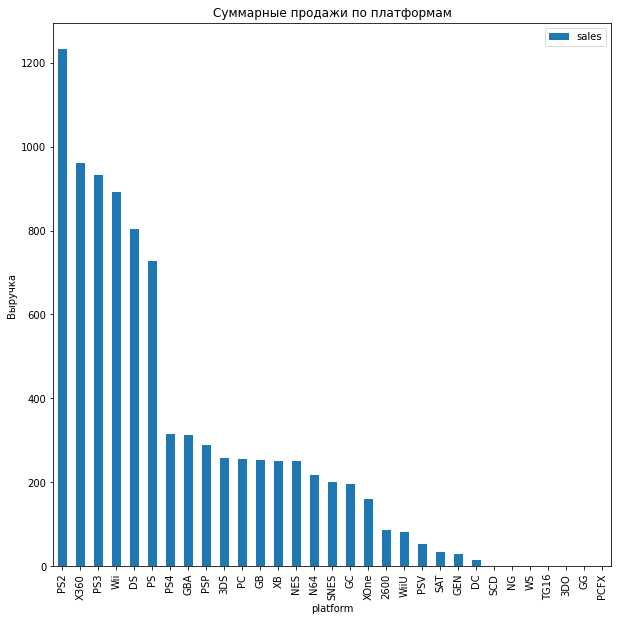

In [34]:
plat1.plot(kind='bar',figsize=(10, 10))
plt.title('Суммарные продажи по платформам')
plt.ylabel('Выручка')
plt.show()

Из графика мы видим, что самая большая выручка у 6 платформ: PS2, X360, PS3, Wii,DS, PS.

In [35]:
top_list = plat1.index[:6].tolist()
print(top_list)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


In [36]:
top_plat=plat.query('platform in @top_list')

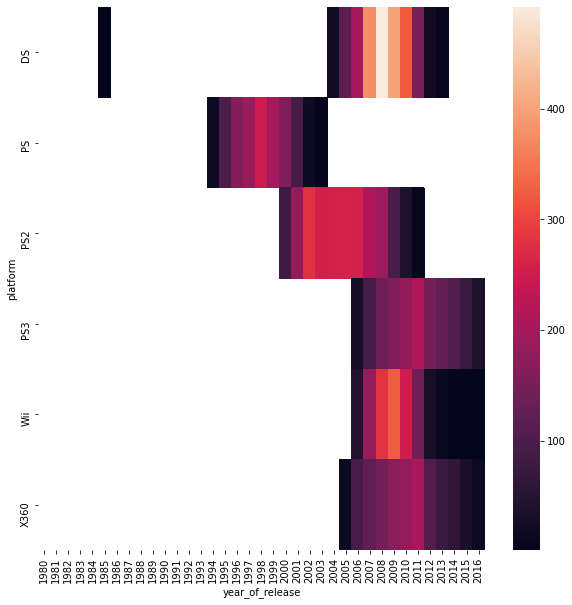

In [37]:
plt.figure(figsize=(10, 10))
sns.heatmap(top_plat)
plt.show()

Распределение по годам 6 самых продаваемых платформ. Средний срок использования приставок около 10 лет. На пике продаж одной платформы (в среднем 5 лет, половина от срока использования) появляется новая.

               Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [38]:
actual_list = data.query('year_of_release > 2012')

Делаем срез платформ за актуальный период - в пределах 4 лет.

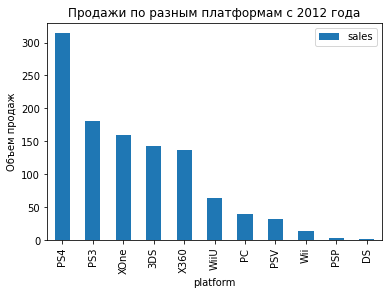

In [39]:
tsale= actual_list.pivot_table(index='platform', values='sales', aggfunc=('sum')).sort_values(by='sales',ascending=False)
tsale.plot(
    kind='bar', title='Продажи по разным платформам с 2012 года',
    ylabel='Объем продаж'
)
plt.show()

In [40]:
list_platform = tsale.index[:5].tolist()
print(list_platform)

['PS4', 'PS3', 'XOne', '3DS', 'X360']


In [41]:
plat2 = actual_list.pivot_table(index = 'platform',columns = 'year_of_release',values = 'sales', aggfunc='count')
display(plat2)

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,91.0,80.0,86.0,46.0
DS,8.0,NaN,NaN,NaN
PC,38.0,47.0,50.0,54.0
PS3,126.0,108.0,73.0,38.0
PS4,16.0,75.0,137.0,164.0
PSP,54.0,10.0,3.0,NaN
PSV,63.0,100.0,110.0,85.0
Wii,12.0,6.0,4.0,1.0
WiiU,42.0,31.0,28.0,14.0


In [42]:
top_platform=plat2.query('platform in @list_platform')

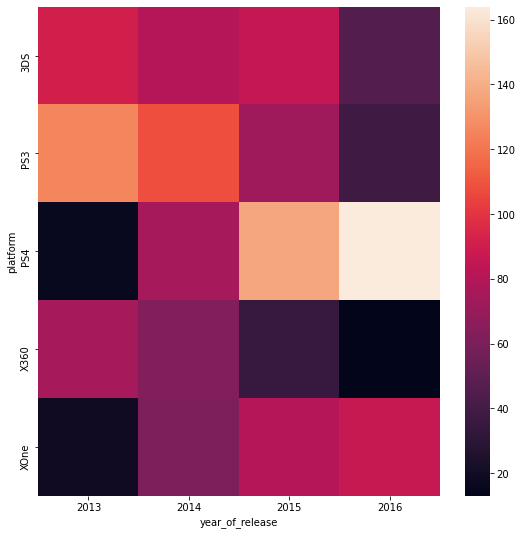

In [43]:
plt.figure(figsize=(9, 9))
sns.heatmap(top_platform)
plt.show()

Актуальной платформой, исходя и графика, является PS4, через пару лет, можно предположить будет выход новой платформы, продажи PS3, X360, 3DS с каждым годом снижаются.

           Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [44]:
actual_list1 = data.query('platform in @list_platform and year_of_release > 2012')

In [45]:
actual_list1.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
13110,Utawarerumono: Futari no Hakuoro,PS4,2016,Misc,0.00,0.00,0.05,0.00,NaN,NaN,-1,0.05
5166,NHL 15,PS3,2014,Sports,0.21,0.09,0.00,0.06,NaN,1.6,E10+,0.36
14304,Dragon's Dogma Online,PS3,2015,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,-1,0.03
12766,Rugby World Cup 2015,PS3,2015,Sports,0.00,0.05,0.00,0.01,NaN,NaN,E,0.06
8030,Metal Gear Solid V: The Phantom Pain,X360,2015,Action,0.12,0.04,0.00,0.02,NaN,7.2,M,0.18
10862,Disney Planes Fire & Rescue,3DS,2014,Action,0.01,0.08,0.00,0.01,NaN,NaN,-1,0.10
2611,Forza Horizon 2,X360,2014,Racing,0.35,0.37,0.00,0.06,NaN,5.1,E10+,0.78
14845,Nekketsu Kouha Kunio-Kun SP: Rantou Kyousoukyoku,3DS,2013,Fighting,0.00,0.00,0.03,0.00,NaN,NaN,-1,0.03
11665,Adventure Time: Finn & Jake Investigations,X360,2015,Action,0.03,0.05,0.00,0.01,NaN,NaN,-1,0.09
5926,Lego Star Wars: The Force Awakens,XOne,2016,Action,0.14,0.13,0.00,0.02,76.0,7.0,E10+,0.29


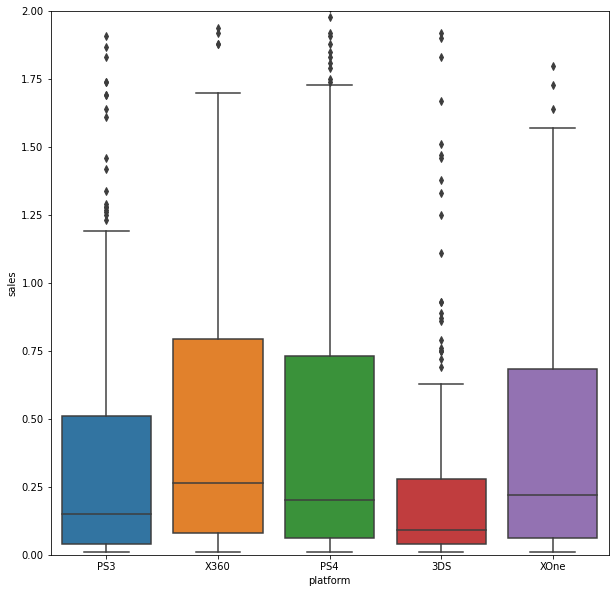

In [46]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 2)
sns.boxplot(x='platform', y='sales', data=actual_list1)
plt.show()

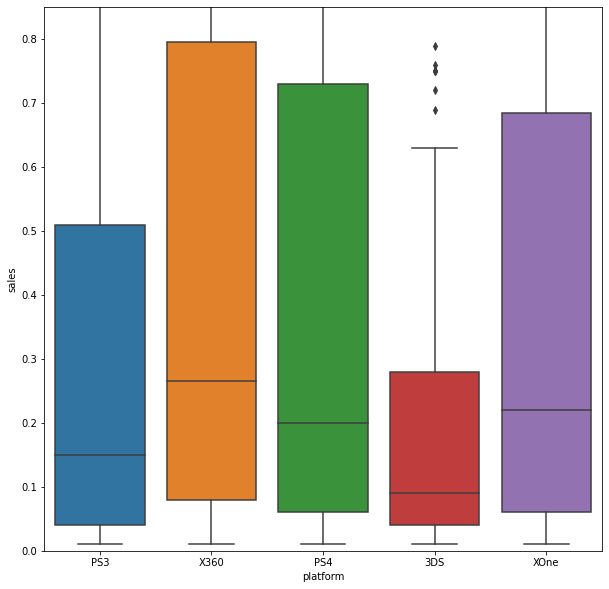

In [47]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 0.85)
sns.boxplot(x='platform', y='sales', data=actual_list1)
plt.show()

Глобальные продажи по 5 топовым платформам. Лидирует по продажам Х360, у 3DS самы низкие продажи, 3 квартиль лежит у нее ниже всех остальных игр. У всех платформ распределение скошено вправо, и медиана (второй квартиль ниже среднего)

         Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

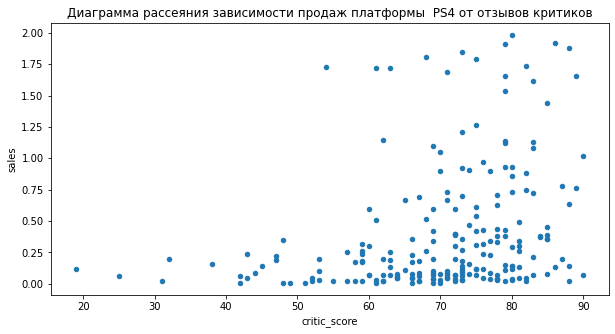

In [48]:
actual_list.query('platform=="PS4" and sales < 2').sort_values(
    by='critic_score',
    ascending=True
).plot(
    kind='scatter',
    
    x='critic_score',
    y='sales',figsize=(10,5),title='Диаграмма рассеяния зависимости продаж платформы  PS4 от отзывов критиков'
)
plt.show()


In [49]:
data_ps4 = actual_list[actual_list['platform'] == 'PS4']
data_ps4_cor = data_ps4['critic_score'].corr(actual_list['sales'])
print(data_ps4_cor)

0.40656790206178095


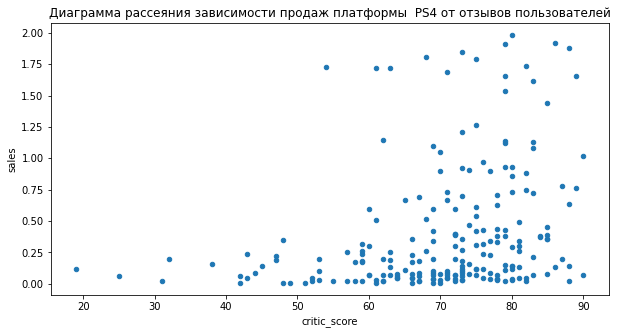

In [50]:
actual_list.query('platform=="PS4" and sales < 2').sort_values(
    by='user_score',
    ascending=True
).plot(
    kind='scatter',
    
    x='critic_score',
    y='sales',figsize=(10,5),title='Диаграмма рассеяния зависимости продаж платформы  PS4 от отзывов пользователей'
)
plt.show()

In [51]:

data1_ps4_cor = data_ps4['user_score'].corr(actual_list['sales'])
print(data1_ps4_cor)

-0.031957110204556376


Зависимость продаж от отзывов критиков положительная, но не сильная. Зависимость продаж от отзывов игроков слабая и отрицательная. 

Оценки критиков демонстрируют прямую, но не очень сильную корреляцию с продажами. Оценки игроков корреляцию с продажами не имеют. 

       Соотнесите выводы с продажами игр на других платформах.

In [52]:
data_ps3 = actual_list[actual_list['platform'] == 'PS3']
data_ps3_cor = data_ps3['critic_score'].corr(actual_list['sales'])
data1_ps3_cor = data_ps3['user_score'].corr(actual_list['sales'])


print(data_ps3_cor)
print(data1_ps3_cor)

0.3342853393371919
0.0023944027357566925


In [53]:
data_xone = actual_list[actual_list['platform'] == 'XOne']
data_xone_cor = data_xone['critic_score'].corr(actual_list['sales'])
data1_xone_cor = data_xone['user_score'].corr(actual_list['sales'])


print(data_xone_cor)
print(data1_xone_cor)

0.4169983280084017
-0.06892505328279414


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'>По двум другим платформам ситуация аналогичная платформе PS4, оценка критиков имеет положительную и средне_слабую корреляцию с продажами, а оценка пользователей корреляции с продажами не имеет.<u><b></b></u></font>
    <br />
    <font color='4682B4'></font>
</div>

     Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

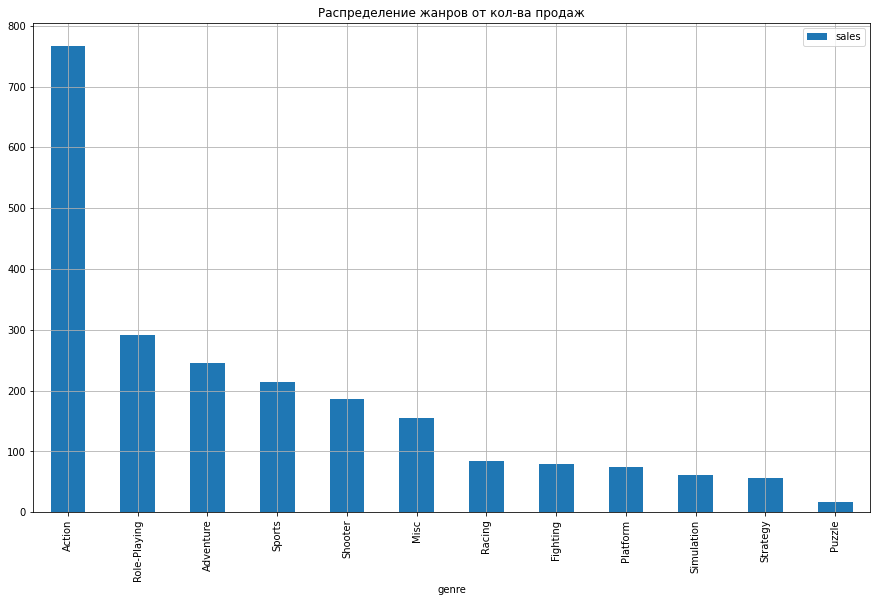

In [54]:
genre_list = actual_list.pivot_table(
    index = 'genre', 
    values = 'sales', 
    aggfunc='count').sort_values(
    by= 'sales',
    ascending=False
)
genre_list.plot(kind='bar',
                grid= True, 
                figsize = (15, 9), 
                title = 'Распределение жанров от кол-ва продаж'
               )
plt.show()

Самым популярным жанром является Экшн, меньше всего продаж у игр в жанре пазл и стратегия. Продажи жанра экшн в 6 раз больше, чем пазл.

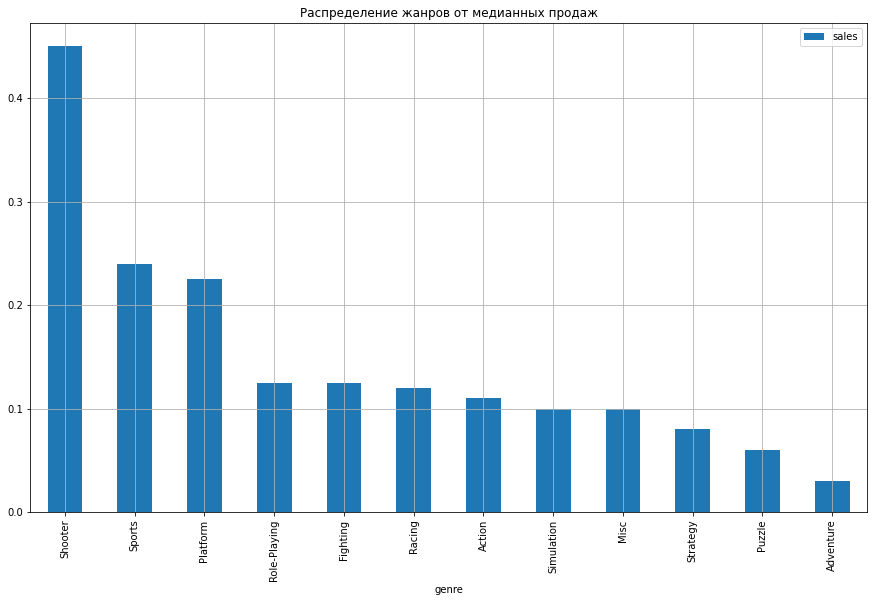

In [55]:
genre_list1 = actual_list.pivot_table(
    index = 'genre', 
    values = 'sales', 
    aggfunc='median').sort_values(
    by= 'sales',
    ascending=False
)

genre_list1.plot(
    kind='bar', 
    grid= True,
    figsize = (15, 9), 
    title = 'Распределение жанров от медианных продаж'
)
plt.show()

Больше всего выручка также у жанра shooter, потом у sport, меньше всего у adventure.

     Шаг 4. Составьте портрет пользователя каждого региона

           Определите для пользователя каждого региона (NA, EU, JP):
          Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [56]:
top_platforms_na = actual_list.pivot_table(
    index='platform', 
    values = ['na_sales','sales'], 
    aggfunc='sum').sort_values(
    by='na_sales',
    ascending=False
)
display(top_platforms_na.head(5))

,na_sales,sales
platform,,
PS4,108.74,314.14
XOne,93.12,159.32
X360,81.66,136.80
PS3,63.50,181.43
3DS,38.20,143.25


Для северной америки самой популярной платформой является Х360, потом PS3.

In [57]:
top_platforms_na['%sales'] = top_platforms_na['na_sales']/top_platforms_na['sales']
print(top_platforms_na['%sales'])

platform
PS4     0.346151
XOne    0.584484
X360    0.596930
PS3     0.349997
3DS     0.266667
WiiU    0.451957
PC      0.281765
Wii     0.480234
PSV     0.152774
DS      0.370130
PSP     0.000000
Name: %sales, dtype: float64


Считаем долю продаж ТОП-5 платформ в СА.

In [58]:
top_platforms_eu = actual_list.pivot_table(
    index='platform',
    values = ['eu_sales','sales'],
    aggfunc='sum').sort_values(
    by='eu_sales',
    ascending=False
)
display(top_platforms_eu.head(5))

,eu_sales,sales
platform,,
PS4,141.09,314.14
PS3,67.81,181.43
XOne,51.59,159.32
X360,42.52,136.80
3DS,30.96,143.25


Для Европы самой популярной платформой является PS3

In [59]:
top_platforms_eu['%sales'] = top_platforms_eu['eu_sales']/top_platforms_eu['sales']
print(top_platforms_eu['%sales'])

platform
PS4     0.449131
PS3     0.373753
XOne    0.323814
X360    0.310819
3DS     0.216126
PC      0.643165
WiiU    0.307133
PSV     0.184905
Wii     0.434114
DS      0.551948
PSP     0.048571
Name: %sales, dtype: float64


Доля продаж для Европы

In [60]:
top_platforms_jp = actual_list.pivot_table(
    index='platform',
    values = ['jp_sales','sales'], 
    aggfunc='sum').sort_values(
    by='jp_sales',
    ascending=False
)
display(top_platforms_jp.head(5))

,jp_sales,sales
platform,,
3DS,67.81,143.25
PS3,23.35,181.43
PSV,18.59,32.99
PS4,15.96,314.14
WiiU,10.88,64.63


Для Японии самой популярной платформой явялется 3DS

In [61]:
top_platforms_jp['%sales'] = top_platforms_jp['jp_sales']/top_platforms_jp['sales']
print(top_platforms_jp['%sales'])

platform
3DS     0.473368
PS3     0.128700
PSV     0.563504
PS4     0.050805
WiiU    0.168343
PSP     0.940000
X360    0.003728
XOne    0.002134
Wii     0.003660
DS      0.000000
PC      0.000000
Name: %sales, dtype: float64


Доля продаж для Японии

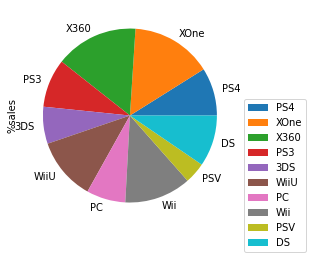

In [62]:
top_platforms_na.plot(kind='pie', y='%sales')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

Платформа X360 самая распространенная платформа в СА. 60% продаж приходится на этот регион.

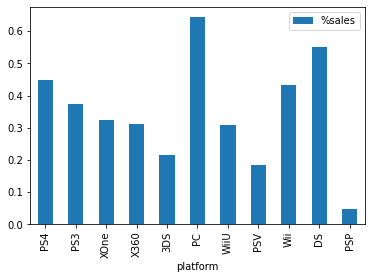

In [63]:
top_platforms_eu.plot(kind='bar', y='%sales')
plt.show()

В Европе доля продаж PS4 больше всего, 44%.

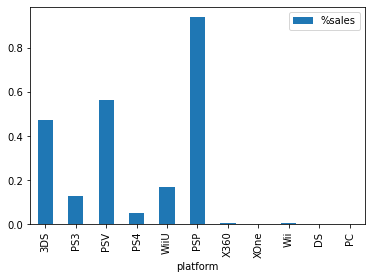

In [64]:
top_platforms_jp.plot(kind='bar', y='%sales')
plt.show()

В японии монополист по доле продаж платформа 3DS.


В каждом рассмотреном регионе в ТОП-5 входят PS3,PS4, XOne, X360

      Самые популярные жанры (топ-5). Поясните разницу.

In [65]:
top_genre_na = actual_list.pivot_table(index='genre', values = 'na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)
display(top_genre_na.head(5))

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


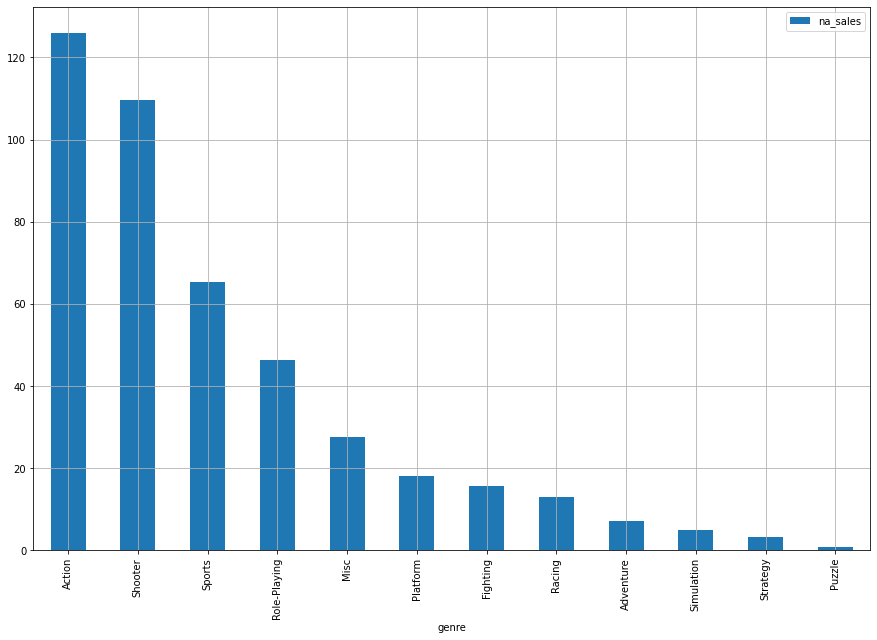

In [66]:
top_genre_na.plot(kind='bar', y='na_sales', figsize=(15,10), grid=True)
plt.show()

In [67]:
top_genre_eu = actual_list.pivot_table(index= 'genre', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales',
    ascending=False

)
print(top_genre_eu.head(5))

              eu_sales
genre                 
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19


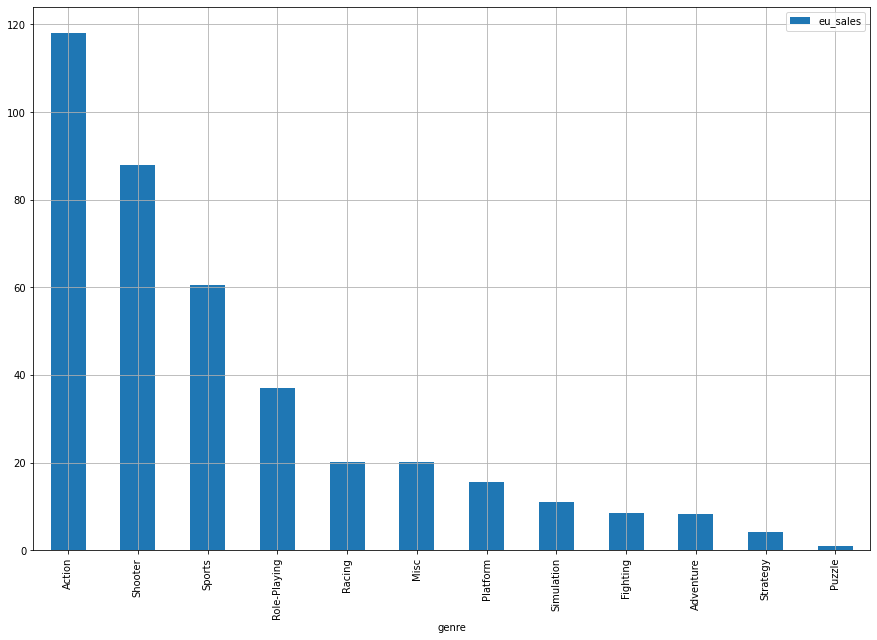

In [68]:
top_genre_eu.plot(kind='bar', y='eu_sales', figsize=(15,10), grid=True)
plt.show()

В СА как и в Европе самым популярным жанром является Экшн, потом спортивный и шутер.

In [69]:
top_genre_jp = actual_list.pivot_table(index= 'genre', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales',
    ascending=False

)
print(top_genre_jp.head(5))

              jp_sales
genre                 
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61


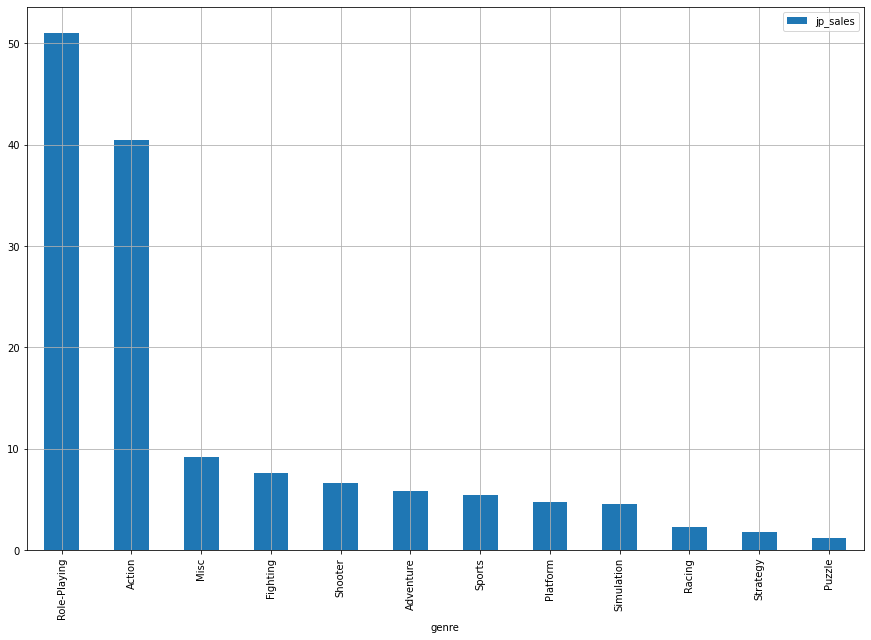

In [70]:
top_genre_jp.plot(kind='bar', y='jp_sales', figsize=(15,10), grid=True)
plt.show()

Самым популярным жанром в Японии является Role_playing.


Разница в популярности жанров может зависеть от спроса игр разлиных возрастных категорий, например, кто в основном играет в платформеные игры в разных регионах, дети, подростки или взрослые, соотвественно каждому препочтителен свой жанр, это мы сможем проверить в следующем пункте. 

      Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [71]:
na_sales_esrb = actual_list.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales',
    ascending=False
)
display(na_sales_esrb)

,na_sales
rating,
M,165.21
-1,89.42
E,79.05
E10+,54.24
T,49.79


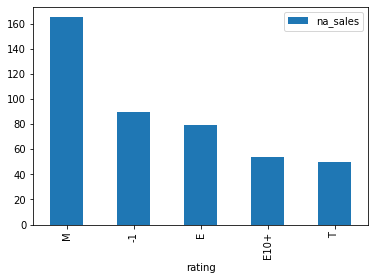

In [72]:
na_sales_esrb.plot(kind='bar', y='na_sales')
plt.show()

В СА лидируют продажи игр категории M

In [73]:
eu_sales_esrb = actual_list.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales',
    ascending=False
)
display(eu_sales_esrb)

,eu_sales
rating,
M,145.32
E,83.36
-1,78.91
E10+,42.69
T,41.95


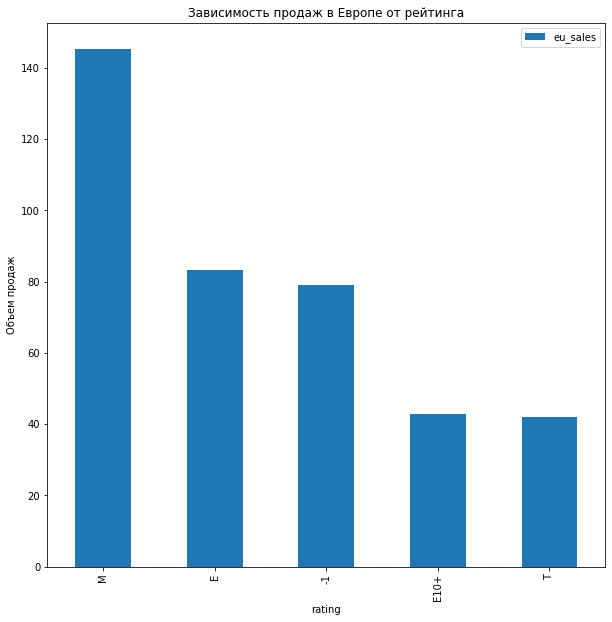

In [74]:
eu_sales_esrb.plot(kind='bar', y='eu_sales', title=('Зависимость продаж в Европе от рейтинга'), figsize=(10, 10))
plt.ylabel('Объем продаж')
plt.show()

В Европе ситуация такая же, как и в СА

In [75]:
jp_sales_esrb = actual_list.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales',
    ascending=False
)
display(jp_sales_esrb)

,jp_sales
rating,
-1,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


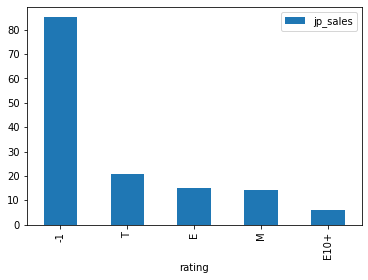

In [76]:
jp_sales_esrb.plot(kind='bar', y='jp_sales')
plt.show()

В Японии чаще продаются игры категории без рейтинга ESRB, т.к. для Японии существует свой рейтинг CERO.

Категория игр прямо влияет на продажи игр, т.к. когда выпускается игра, необходимо учитывать возрастные ограничения, и какой на них спрос в разных регионах.

Изначальные пропуски  в рейтингах, это рейтинги других регионов, поэтому, для СА (-1) это может быть игра с  европейским или японским рейтингом, точно также как и для соответствующих стран отсутствие рейтинга у игр. В данном материале использован только рейтинг ESRB, если бы учитывались игры с другими рейтингами, пропусков скорее всего не было бы.

Во всех регионах игры категории Е10+ не очень популярны.


Делая выводы, можно сказать, что для Европы и СА главным является пользователь, отдавший предпочтение играм категории для взрослых. А для Японии исходя из рейтинга ESRB является пользователь, выбравший категории подростков.


                Шаг 5. Проверьте гипотезы
   
   
   
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны

    

In [77]:
xbox_one_data = actual_list.query('platform == "XOne"')
pc_data = actual_list.query('platform == "PC"')

In [78]:
xone_score_means = xbox_one_data['user_score'].mean()
pc_score_means = pc_data['user_score'].mean()

print('Средние пользовательские рейтинги Xbox One:',xone_score_means)
print('Средние пользовательские рейтинги PC:',pc_score_means)

Средние пользовательские рейтинги Xbox One: 6.521428571428572
Средние пользовательские рейтинги PC: 6.269677419354839


In [79]:
results = st.ttest_ind(xbox_one_data['user_score'],pc_data['user_score'], equal_var=False, nan_policy='omit' )

alpha= 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергнуть не получилось')
        

0.1475959401343032
Нулевую гипотезу отвергнуть не получилось


    Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
     
    Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

In [80]:
action_data = actual_list.query('genre=="Action"')
sports_data = actual_list.query('genre=="Sports"')

In [81]:
action_score_means = action_data['user_score'].mean()
sports_score_means = sports_data['user_score'].mean()

print('Средние пользовательские рейтинги жанра Action:', action_score_means)
print('Средние пользовательские рейтинги жанра Sports:', sports_score_means)

Средние пользовательские рейтинги жанра Action: 6.837532133676093
Средние пользовательские рейтинги жанра Sports: 5.238124999999999


In [83]:
results = st.ttest_ind(action_data['user_score'],sports_data['user_score'], equal_var=False,  nan_policy='omit')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.4460039700703482e-20
Отвергаем нулевую гипотезу


Формулирование нулевой гипотезы происходило  путем приравнивания  двух совокупностей, со общепринятой статистической значимостью 5%. Альтернативная гипотеза же наоборрот, что две совокупности не равны.

    Общий вывод:
    
        Проработав начальный датасет и приведя его к рабочему виду,  заполнив пропуски где это возможно, мы получили следующие отобрали самые популярные на данный момент платформы, и начали их анализировать. Что мы при этом выявили: средний срок службы платформы примерно 10 лет. Самые высокие продажи платформ приходятся на середину его срока службы, примерно через это же время на рынке появляется новая платформа, которая сменяет старую, поэтому при выпуске новой платформы, нужно начинать приступать к разработке новой. Самым популярным жанром в СА и Европе является shooter и sport, в Японии же это Role_playing. Акцент нужно делать на них, т.к. они являются еще и самыми прибыльными. Что касается рейтингов игр, то нужно учитывать при разработке внутренний рейтинг для каждого региона, как оказалось, он может быть свой, не для всех стран показателем является ESRB. Основным потребителем в СА и Европе являются взрослые люди старше 17 лет, а вот в Японии это подростки.